In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr,pearsonr, linregress
# from scipy.stats import pearsonr
import pandas as pd
from matplotlib import rcParams
T = np.transpose

In [2]:
# read in data
dat = pd.read_csv("hallem1.txt",delimiter=' ')
dat3 = dat.values

In [3]:
# Odors of Interest from novelty paper

## Present Hallem data set
# (ACP) acetophenone       -neutral [present] {-3, 10, 62}
# (BEN) benzaldehyde       -aversive [present] {5, 200, 57}
# (MBL) 3-methyl-1-butanol -neutral [present] {30, 157, 97} **here called 3-methylbutanol
# (IPA) isopentyl acetate  -attractive [present] {65, -33, 139}
# (HXA) hexyl acetate      -attractive [present] {29, -19, 44}

## Absent Hallem data set
# (MCH) 4-methylcyclohexanol -aversive [absent]
# (OCT) 3-octanol            - aversive [absent]

array([[  3, -21,  32, ...,  17,   0,  24],
       [  6, -36,  26, ...,   8,  -6,  17],
       [  1, -41,  21, ...,  16,   0,  21],
       ...,
       [ 39,  31,  75, ...,  77,  -7,  66],
       [ 16, -11,  21, ...,  12,   5,   4],
       [  8,  17,   3, ...,   7,  26,  12]])

In [5]:
odor_starts = {'ACP':[-3,10,62],'BEN':[5,200,57],'MBL':[30,157,97],
              'IPA':[65,-33,139],'HXA':[29,-19,44]}
odor_vec = {}
for tag in odor_starts:
    odor_start = odor_starts[tag]
    my_row = (dat3[:,0] == odor_start[0]) & (dat3[:,1] == odor_start[1]) &(dat3[:,2] == odor_start[2])
    odor_vec[tag] = dat3[my_row][0]

In [6]:
corr_odors = {}
for i in enumerate(odor_vec):
    for j in enumerate(odor_vec):
        if i[0] <= j[0]: continue
        corr_odors[i[1]+'~'+j[1]] = spearmanr(odor_vec[i[1]],odor_vec[j[1]])[0]

In [7]:
def odor_plot(odor_1,odor_2):
    plt.plot(odor_vec[odor_1],odor_vec[odor_2],'kx')
    plt.title('$r_s$=%.2f (p=%.2f)' %spearmanr(odor_vec[odor_1],odor_vec[odor_2]) )
    plt.xlabel(odor_1)
    plt.ylabel(odor_2)
    plt.show()
# odor_plot('BEN','ACP')
# odor_plot('MBL','ACP')
corr_odors

{'BEN~ACP': 0.720854370641545,
 'BEN~HXA': 0.014818046313066826,
 'HXA~ACP': 0.13672045355429568,
 'IPA~ACP': 0.5268893556579705,
 'IPA~BEN': 0.3150566902527531,
 'IPA~HXA': 0.5978670126598292,
 'MBL~ACP': 0.16467010419308414,
 'MBL~BEN': 0.29821509138617386,
 'MBL~HXA': 0.3498150626112343,
 'MBL~IPA': 0.21400610984919782}

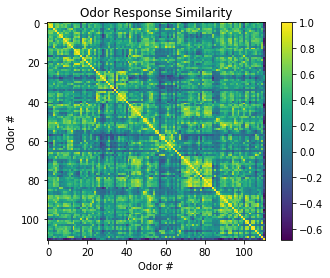

In [8]:
cross_corr_odors = np.corrcoef(dat3)
plt.imshow(cross_corr_odors)
plt.colorbar()
plt.xlabel('Odor #')
plt.ylabel('Odor #')
plt.title('Odor Response Similarity')
plt.show()

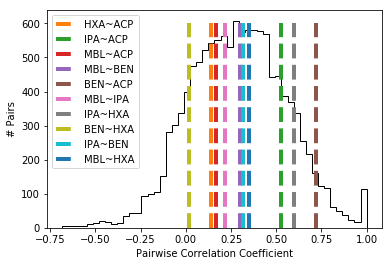

In [9]:
plt.hist(cross_corr_odors.flatten(),50,histtype = 'step', fill = None,edgecolor='k')
plt.xlabel('Pairwise Correlation Coefficient')
plt.ylabel('# Pairs')
for i in corr_odors:
    plt.plot([corr_odors[i],corr_odors[i]],[0,600],'--',label = i,linewidth=4.0)
    
plt.legend()
plt.show()

In [10]:
# odor supression index
odor_supress = {'BEN':1.0,'ACP':0.5,'MBL':0.65,'IPA':0.8,'HXA':0.95}
corr_supress = []
for i in corr_odors:
    this_pair = i.split('~')
    corr_supress.append((corr_odors[i],odor_supress[this_pair[0]],odor_supress[this_pair[1]]))

Greater Supression Means less MCH Response


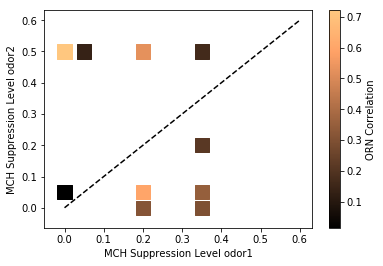

In [11]:
print('Greater Supression Means less MCH Response')
CS = np.array(corr_supress)
plt.scatter(1-CS[:,1],1-CS[:,2],s=200,marker='s',c=CS[:,0],cmap='copper')
plt.colorbar(label='ORN Correlation')
plt.plot([0, .6],[0,.6],'k--')
plt.xlabel('MCH Suppression Level odor1')
plt.ylabel('MCH Suppression Level odor2')
plt.show()

In [12]:
# IONOTROPIC RECEPTOR DATA
MCH = np.array([5.7,-20,-12.8,-13.3])
ACP = np.array([5.6,-3.6,-0.2,-6.2])
MBL = np.array([4.3, -19.6, -1, -2.4])
HXA = np.array([10.6,1.2,3.3,-6.5])
BEN = np.array([-2.3,-22.1,-6.2,0.8])

In [13]:
# Hypothesis, MBL and ACP will be closer in euclidean distance to MCH than to HXA
def dist_from(vec_A,vec_B):
    diff = vec_A-vec_B
    #bar = np.sqrt(np.sum(np.square(diff)))
    bar = spearmanr(vec_A,vec_B)[0]
    return bar

In [14]:
IR_d_from_MCH = {'ACP':dist_from(ACP,MCH),'MBL':dist_from(MBL,MCH),
                 'HXA':dist_from(HXA,MCH),'BEN':dist_from(BEN,MCH)}
IR = []
for i in IR_d_from_MCH:
    IR.append((IR_d_from_MCH[i],odor_supress[i]))
IR = np.array(IR)

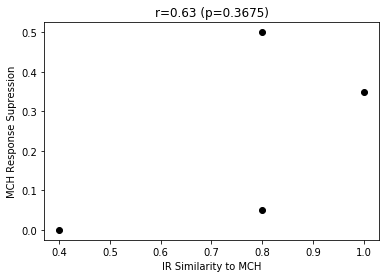

In [15]:
plt.plot(IR[:,0],1-IR[:,1],'ko')
plt.xlabel('IR Similarity to MCH')
plt.ylabel('MCH Response Supression')
plt.title('r=%.2f (p=%.4f)' %spearmanr(IR[:,0],1-IR[:,1]))
plt.show()

In [16]:
# print('Euclidean Distance from MCH of normalized SR in 4 IR neurons:\n')
print('Correlation Coefficient with MCH of normalized SR in 4 IR neurons:\n')
print('Supressing Odors:')
print('ACP: {0:.2f}, MBL: {1:.2f}\n'.format(IR_d_from_MCH['ACP'],IR_d_from_MCH['MBL']))
print('Non-Supressing Odors:')
print('BEN: {0:.2f}, HXA: {1:.2f}'.format(IR_d_from_MCH['BEN'],IR_d_from_MCH['HXA']))

Correlation Coefficient with MCH of normalized SR in 4 IR neurons:

Supressing Odors:
ACP: 0.80, MBL: 1.00

Non-Supressing Odors:
BEN: 0.40, HXA: 0.80


In [17]:
# Question: if A +/B and A+/C, does that imply A+/C
n_in = 20000
n_check = 100
n_dim = 30
dat = np.random.uniform(size=(3,n_in,n_dim))
c1 = np.zeros(n_check)
c2 = np.zeros(n_check)
c3 = np.zeros(n_check)
for i in range(n_check):
    while (np.abs(c1[i])<.4) | (np.abs(c2[i])<.4):
        ind1 = np.random.randint(0,n_in)
        c1[i] = spearmanr(dat[0,ind1,:],dat[1,ind1,:])[0]
        c2[i] = spearmanr(dat[0,ind1,:],dat[2,ind1,:])[0]
#     ind1 = np.random.randint(0,n_in)
#     c1[i] = spearmanr(dat[0,ind1,:],dat[1,ind1,:])[0]
#     c2[i] = spearmanr(dat[0,ind1,:],dat[2,ind1,:])[0]
    c3[i] = spearmanr(dat[1,ind1,:],dat[2,ind1,:])[0]
    if i%10==0: print(i)

0
10
20


KeyboardInterrupt: 

In [ ]:
plt.scatter(c1,c2,c=c3,alpha=1)
plt.colorbar(label='Corr B~C')
plt.title('N-dimensions %i' %n_dim)
plt.xlabel('Corr A~B')
plt.ylabel('Corr A~C')
plt.show()

# Load DoOR dataset

In [6]:
dat = pd.read_csv("DRM.csv")
dat = dat.drop(columns='Unnamed: 0')
dat_mat = np.array(dat) # 693 odors x 78 responses


In [10]:
tmp = pd.read_csv("DRM.csv")
np.shape(dat_mat)

(693, 78)

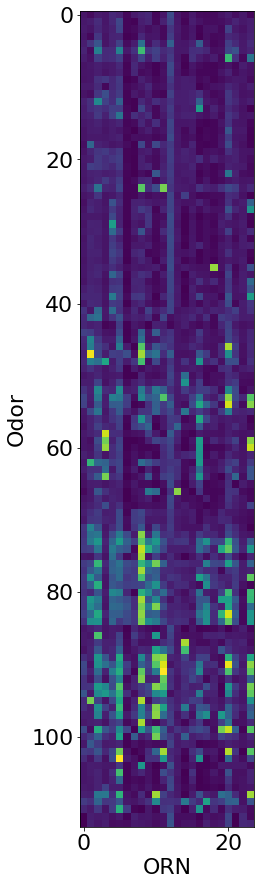

(113, 24)


In [81]:
# np.shape(dat_mat) #693 odors x 78 ORNs
n_odor = np.sum(~np.isnan(dat_mat),axis=0)
good_odors = np.sum(~np.isnan(dat_mat),axis=1)>20 # min num ORNS
dat_go = dat_mat[good_odors,:]
np.shape(dat_go)

n_odor = np.sum(~np.isnan(dat_go),axis=0)
odor_go = np.sum(~np.isnan(dat_go),axis=0)>110 # min num odors
dat_go2 = dat_go[:,odor_go]

good_odors2 = np.sum(~np.isnan(dat_go2),axis=1)>20 # min num ORNS
dat_go3 = dat_go2[good_odors2,:]
good_orns2 = np.sum(~np.isnan(dat_go3),axis=0)>110 # min num odors
dat_go4 = dat_go3[:,good_orns2]
good_odors3 = np.sum(~np.isnan(dat_go4),axis=1)>20 # min num ORNS
dat_go5 = dat_go4[good_odors3,:]

plt.figure(figsize=(15,15))
plt.imshow(dat_go5)
plt.xlabel('ORN')
plt.ylabel('Odor')
plt.show()
print(np.shape(dat_go5))

In [70]:
#dat_go5 # 56 odors x 29 ORNS
sav_csv = 'DoOR_dat_subset_complete.csv'
np.savetxt(sav_csv,dat_go5,delimiter=',')

In [73]:
!ls

DoOR_dat_subset_complete.csv  hallem1.txt	 OdorAnalysis.ipynb
DRM.csv			      nmeth.1197-S3.xls
hallem06Table S1.pdf	      novelty_odors.csv


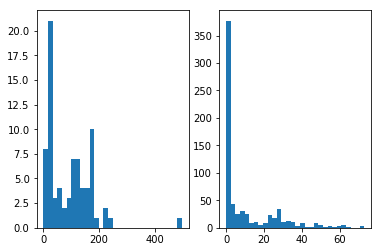

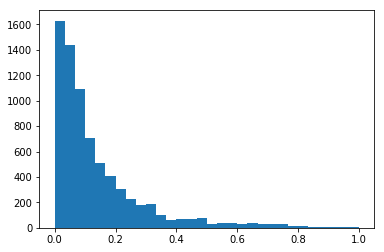

In [3]:
foo = ~np.isnan(dat_mat) #693 odors x 78 ORNs
orn_odor = np.sum(foo,axis=1)  #693 odors
odor_orn = np.sum(foo,axis=0)  #78 odors
vals = dat_mat.flatten()
vals = vals[~np.isnan(vals)]
plt.subplot(1,2,1)
plt.hist(odor_orn,30)
plt.subplot(1,2,2)
plt.hist(orn_odor,30)
plt.show()

plt.hist(vals,30)
plt.show()

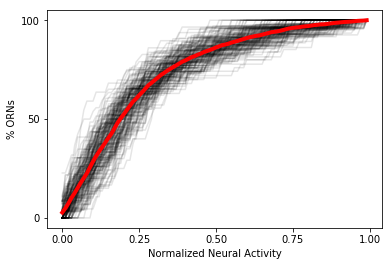

In [4]:
subtract_mean = True
avg_bins = []
for i in range(693):
    try:
        this_dat = dat_mat[i]
        this_dat = this_dat[~np.isnan(this_dat)]
        if len(this_dat)<20:
            continue
        if subtract_mean:
            this_dat = this_dat * (.3/np.mean(this_dat))
        n_bin, bins = np.histogram(this_dat,np.arange(0,1.01,.01))

        cdf = np.cumsum(n_bin)/sum(n_bin)
        #t = np.arange(0,1,1/len(this_dat))
        t = bins[:-1]
        plt.plot(t, cdf*100,'k',alpha=.1)
        avg_bins.append(cdf)
    except:
        pass
else:
    
    rcParams.update({'font.size': 22})
    avg_trace = np.mean(np.stack(avg_bins),axis=0)
    plt.plot(t, avg_trace*100,'r',linewidth=4)
    rcParams.update({'font.size': 22})
    plt.xlabel('Normalized Neural Activity')
    plt.ylabel('% ORNs')
    plt.show()



In [26]:
dat_s = pd.read_csv("novelty_odors.csv")
dat_s = dat_s.drop(columns='Unnamed: 0')

In [27]:
X = np.array(dat_s) # 78 ORNs x 8 Odors
complete_odors = np.sum(~np.isnan(T(X)),axis=0)==8 # 78
X_comp = X[complete_odors] # 21 x 8 Odors


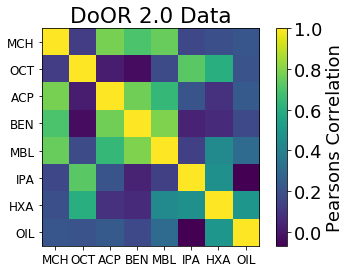

In [28]:
rcParams.update({'font.size': 12})
nCor = np.corrcoef(X_comp,rowvar=False)
nNoOil = nCor[:-1,:-1]
plt.imshow(nCor)
plt.xticks(range(8),dat_s.columns)
plt.yticks(range(8),dat_s.columns)
rcParams.update({'font.size': 18})
plt.colorbar(label = 'Pearsons Correlation')
plt.title('DoOR 2.0 Data')
plt.show()

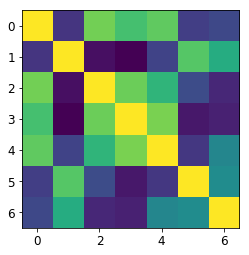

In [29]:
# no oil
rcParams.update({'font.size': 12})
plt.imshow(nNoOil)
plt.show()

In [30]:
this_dat = dat_mat[10]
this_dat = this_dat[~np.isnan(this_dat)]

# Load Odor Similarity data

In [13]:
sdat = pd.read_excel('nmeth.1197-S3.xls',header=8)
CID_want = {'MCH':11524,'ACP':7410,'MBL':31260,'HXA':8908,'BEN':240,'IPA':31276,'OCT':11527} #
# my_odors = np.array(list(CID_want.keys()))
my_odors = np.array(dat_s.columns)[:-1]
CIDS = sdat['Odorant PubMed CID']

In [14]:
Hash_want = {}
Hash_all = np.zeros((len(CID_want),32))
i=0
for odor in my_odors:
    this_key = CID_want[odor]
    ind = np.where(CIDS == this_key)[0][0]
    this_hash = np.array(sdat.loc[ind][3:])
    Hash_want[odor] = this_hash
    Hash_all[i] = this_hash
    i+=1
    

In [15]:
# o_use = np.array([1,5,6,0,3,4,2])
o_use = np.arange(7)
my_cor = np.corrcoef(Hash_all[o_use])
MCH_cor = my_cor[0,:]

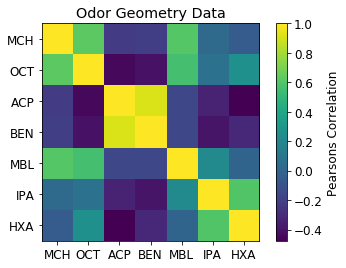

In [18]:
plt.imshow(my_cor)
plt.colorbar(label = 'Pearsons Correlation')
plt.xticks(range(7),my_odors[o_use])
plt.yticks(range(7),my_odors[o_use])
plt.title('Odor Geometry Data')
plt.show()

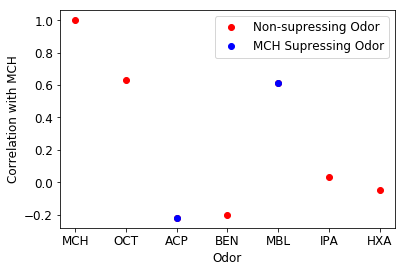

In [19]:

is_sup = np.array([2,4])
plt.plot(range(7),MCH_cor,'ro',label='Non-supressing Odor')
plt.plot(is_sup,MCH_cor[is_sup],'bo',label='MCH Supressing Odor')
plt.xticks(range(7),my_odors)
plt.xlabel('Odor')
plt.ylabel('Correlation with MCH')
plt.legend()
plt.show()

# Compare dataset Correlations 

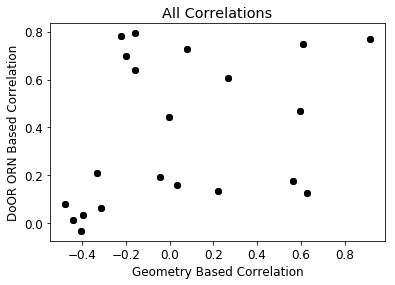

(0.35631615281023793, 0.02055279138795664)

In [20]:
# my_cor # Geometry
# nCor # DoOR
bad = my_cor>.99
x1 = my_cor[~ bad]
x2 = nNoOil[~bad]
plt.plot(x1,x2,'ko')
#plt.plot([-.5, 1],[-.5,1],'k--')
plt.xlabel('Geometry Based Correlation')
plt.ylabel('DoOR ORN Based Correlation')

plt.title('All Correlations')
plt.show()
pearsonr(x1,x2)

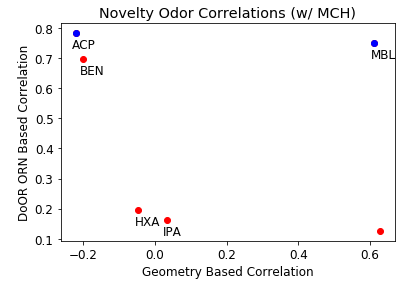

In [21]:
y1 = my_cor[0,1:]
y2 = nNoOil[0,1:]
fig, ax = plt.subplots()
plt.plot(y1,y2,'ro')
plt.plot(y1[is_sup-1],y2[is_sup-1],'bo')
plt.xlabel('Geometry Based Correlation')
plt.ylabel('DoOR ORN Based Correlation')
plt.title('Novelty Odor Correlations (w/ MCH)')
for i,txt in enumerate(dat_s.columns):
    if i<7 and i!=0:
        ax.annotate(txt,(y1[i-1]-.01,y2[i-1]-.05))

plt.show()

# Project to KC Space

In [31]:
# Project DoOR to KC space
# X_comp # 21 x 8
n_orn, n_odor = np.shape(X_comp)
Xu = T(X_comp) # 8 x 21
import sys
sys.path.append("../") 
from bloom_filters import *
# X_z = [(x-np.mean(x))/np.std(x) for x in T(X_comp)]
# Xz = T(X_comp - np.mean(X_comp,axis=0)) # mean subtract only (by odor)
Xz = T(X_comp *100/np.mean(X_comp,axis=0)) # set mean rate to 100
#Xz = T(X_comp)
#Xz = (Xu- np.mean(Xu,axis=0))/np.std(Xu,axis=0) # z-by-receptor
# Xz = X - 
# Xz = T((X_comp- np.mean(X_comp,axis=0))/np.std(X_comp,axis=0)) # z-by-odor
#Xz = (Xz- np.mean(Xz,axis=0))/np.std(Xz,axis=0) # z-by-odor&receptor must have above line too
#Xz = Xu
outHash,datHash,datIn = generate_hash_space_wDat(Xz,m=50,k=5)
oo = np.array([2,4])
ox = np.array([1,3,5,6,7])

In [32]:
# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
# plt.hist(X_comp,10)
# plt.xlabel('ORN Value')
# plt.ylabel('#')
# plt.subplot(1,2,2)
# plt.hist(T(Xz),10)
# plt.xlabel('Normalized ORN Value')
# plt.show()
# ?plt.hist

In [33]:
def hamming_distance(x1,x2):
    assert(len(x1)==len(x2))
    try:
        return sum(x1^x2) # ^ is xor
    except:
        return sum((x1>0)^(x2>0)) # ^ is xor

In [34]:
#M = np.random.randn(n_orn,50)
#hash_val = np.dot(Xz,M)
m = 350
k = 17
#outHash,datHash,datIn = generate_hash_space_wDat(Xz,m=m,k=k,sparseBinary='SB6')
outHash,datHash,datIn = generate_hash_space_wDat(Xz,m=m,k=k)
this_h = np.zeros((n_odor,n_odor))
for i in range(n_odor):
    for j in range(n_odor):
        this_h[i,j] = hamming_distance(outHash[i],outHash[j])

In [35]:
def discrete_matshow(data):
    #get discrete colormap
    cmap = plt.get_cmap('Pastel1', (np.max(data)-np.min(data)+1))
    # set limits .5 outside true range
    mat = plt.imshow(data,cmap=cmap,vmin = np.min(data)-.5, vmax = np.max(data)+.5)
    #tell the colorbar to tick at integers
    cax = plt.colorbar(mat, ticks=np.arange(np.min(data),np.max(data)+1,2))
    return cax
def std_err(X):
    # assumes along columns
    return np.std(X,axis=0)/np.sqrt(np.shape(X)[0])

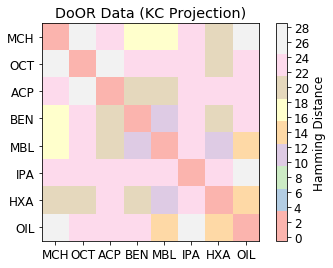

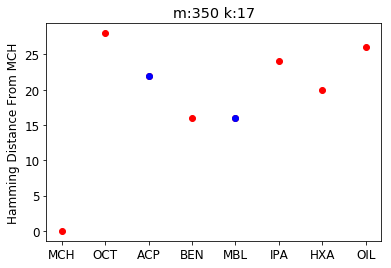

In [36]:
cbar = discrete_matshow(this_h)
cbar.set_label('Hamming Distance')
plt.xticks(range(8),dat_s.columns)
plt.yticks(range(8),dat_s.columns)
# plt.colorbar(label = 'Hamming Distance')
plt.title('DoOR Data (KC Projection)')
plt.show()

plt.title('m:%d k:%d' %(m,k))
plt.plot(this_h[0,:],'ro')
plt.plot(oo,this_h[0,oo],'bo')
plt.xticks(range(8),dat_s.columns)
plt.ylabel('Hamming Distance From MCH')
# plt.title('DoOR Data (KC Projection)')
plt.show()

In [37]:
SB_str = 'SB4'
#SB_str = None
n_reps = 30
MCH_hash = np.zeros((n_reps,8))
MCH_hashSB=np.zeros((n_reps,8))
for ii in range(n_reps):
    outHash,_,_ = generate_hash_space_wDat(Xz,m=m,k=k,sparseBinary=None) # None, 'SB6'
    outHashSB,_,_ = generate_hash_space_wDat(Xz,m=m,k=k,sparseBinary=SB_str) # None, 'SB6'
    this_h = np.zeros((n_odor,n_odor))
    this_hSB = np.zeros((n_odor,n_odor))
    for i in range(n_odor):
        for j in range(n_odor):
            this_h[i,j] = hamming_distance(outHash[i],outHash[j])
            this_hSB[i,j] = hamming_distance(outHashSB[i],outHashSB[j])
    MCH_hash[ii,:] = this_h[0,:]
    MCH_hashSB[ii,:] = this_hSB[0,:]

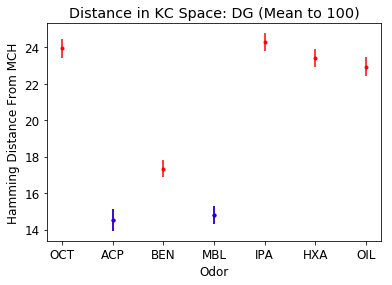

In [38]:
x = np.arange(1,8)
plt.errorbar(x,np.mean(MCH_hash[:,x],axis=0),yerr=std_err(MCH_hash[:,x]),fmt='r.')
plt.errorbar(oo,np.mean(MCH_hash[:,oo],axis=0),yerr=std_err(MCH_hash[:,oo]),fmt='b.')
plt.xticks(x,dat_s.columns[x])
plt.ylabel('Hamming Distance From MCH')
plt.xlabel('Odor')
# plt.title('Distance in KC Space: '+ SB_str +' Projection  (Mean to 100)')
plt.title('Distance in KC Space: DG (Mean to 100)')
plt.show()

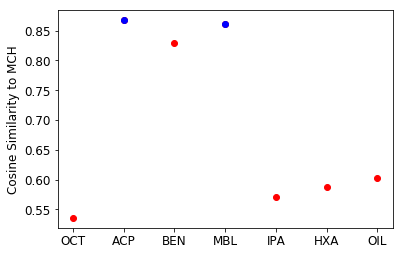

In [39]:
# distance in ORN space
# np.shape(Xz) # 8,21
Xd = Xz - Xz[0] # subtract MCH from all
Xd_euc = np.sum(Xd**2,axis=1)**.5
Xd_cos = np.dot(Xz,Xz[0])/(np.sum(Xz[0]**2)**.5*np.sum(Xz**2,axis=1)**.5)
met_view = Xd_cos
# met_view = Xd_euc
plt.plot(x,met_view[1:],'ro')
plt.plot(oo,met_view[oo],'bo')
plt.xticks( x,dat_s.columns[x])
# plt.ylabel('Euclidean From MCH')
plt.ylabel('Cosine Similarity to MCH')
plt.show()

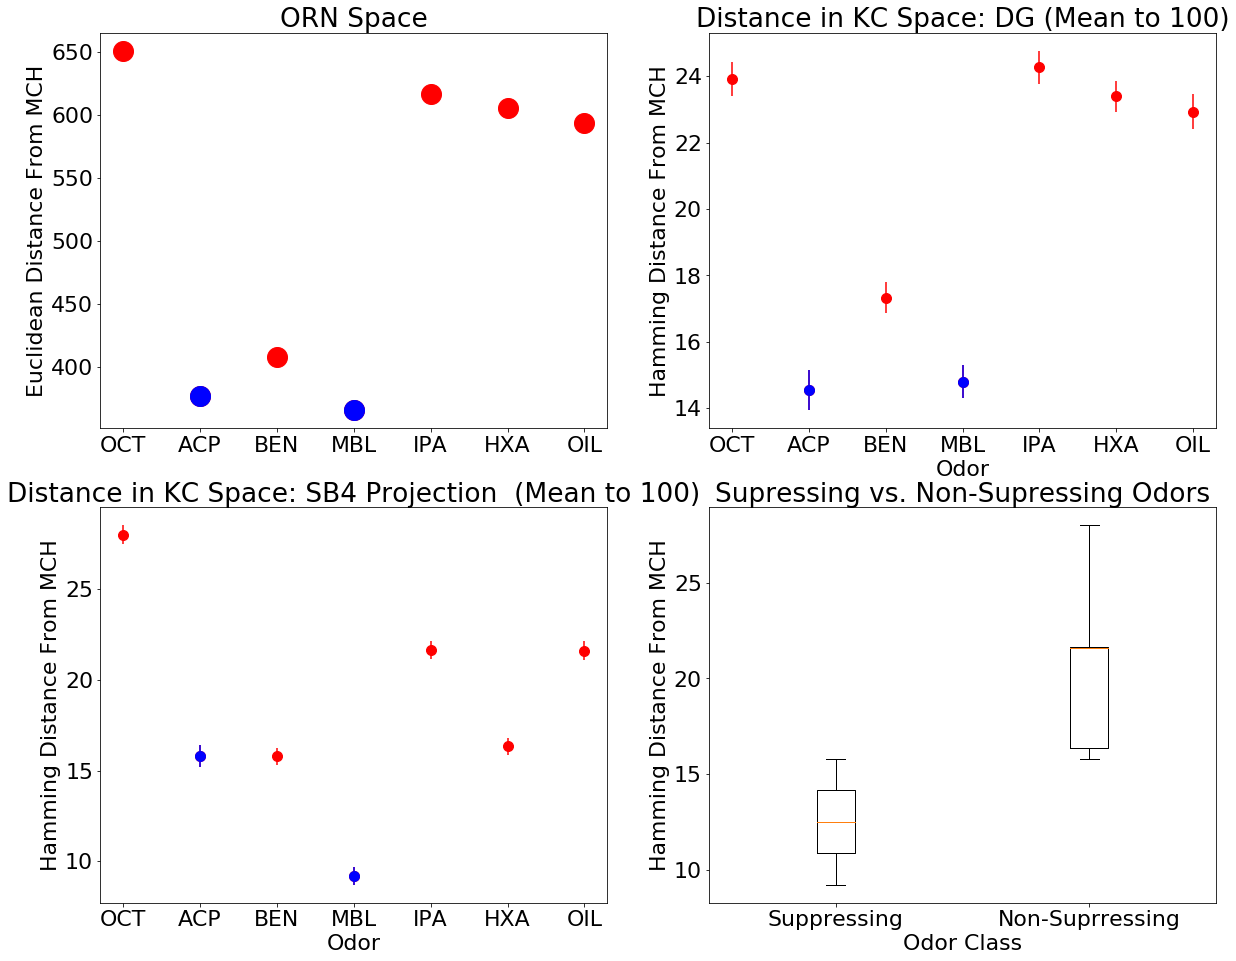

In [40]:

rcParams.update({'font.size': 22})
plt.figure(figsize=(20,16))
ms = 20

plt.subplot(2,2,1)
plt.plot(x,Xd_euc[1:],'ro',ms=ms)
plt.plot(oo,Xd_euc[oo],'bo',ms=ms)
plt.xticks( x,dat_s.columns[x])
plt.ylabel('Euclidean Distance From MCH')
plt.title("ORN Space")

plt.subplot(2,2,2)
x = np.arange(1,8)
plt.errorbar(x,np.mean(MCH_hash[:,x],axis=0),yerr=std_err(MCH_hash[:,x]),fmt='r.',ms=ms)
plt.errorbar(oo,np.mean(MCH_hash[:,oo],axis=0),yerr=std_err(MCH_hash[:,oo]),fmt='b.',ms=ms)
plt.xticks(x,dat_s.columns[x])
plt.ylabel('Hamming Distance From MCH')
plt.xlabel('Odor')
plt.title('Distance in KC Space: DG (Mean to 100)')

plt.subplot(2,2,3)
x = np.arange(1,8)
plt.errorbar(x,np.mean(MCH_hashSB[:,x],axis=0),yerr=std_err(MCH_hash[:,x]),fmt='r.',ms=ms)
plt.errorbar(oo,np.mean(MCH_hashSB[:,oo],axis=0),yerr=std_err(MCH_hash[:,oo]),fmt='b.',ms=ms)
plt.xticks(x,dat_s.columns[x])
plt.ylabel('Hamming Distance From MCH')
plt.xlabel('Odor')
plt.title('Distance in KC Space: '+ SB_str +' Projection  (Mean to 100)')

plt.subplot(2,2,4)
dbar = [np.mean(MCH_hashSB[:,oo],axis=0),np.mean(MCH_hashSB[:,ox],axis=0)]
plt.boxplot(dbar)
plt.xticks([1,2],['Suppressing','Non-Suprressing'])
plt.xlabel('Odor Class')
plt.ylabel('Hamming Distance From MCH')
plt.title('Supressing vs. Non-Supressing Odors')
plt.show()

In [41]:
# Supression data
sup_dat = {'OCT':1.0,'ACP':.5,'BEN':1.0,'MBL':.65,'IPA':.85,'HXA':.95,'OIL':.95,'MCH':.1}
i = 0
xx = np.zeros(len(sup_dat))
for od in dat_s.columns:
    #print (od)
    xx[i] = sup_dat[od]
    i+=1


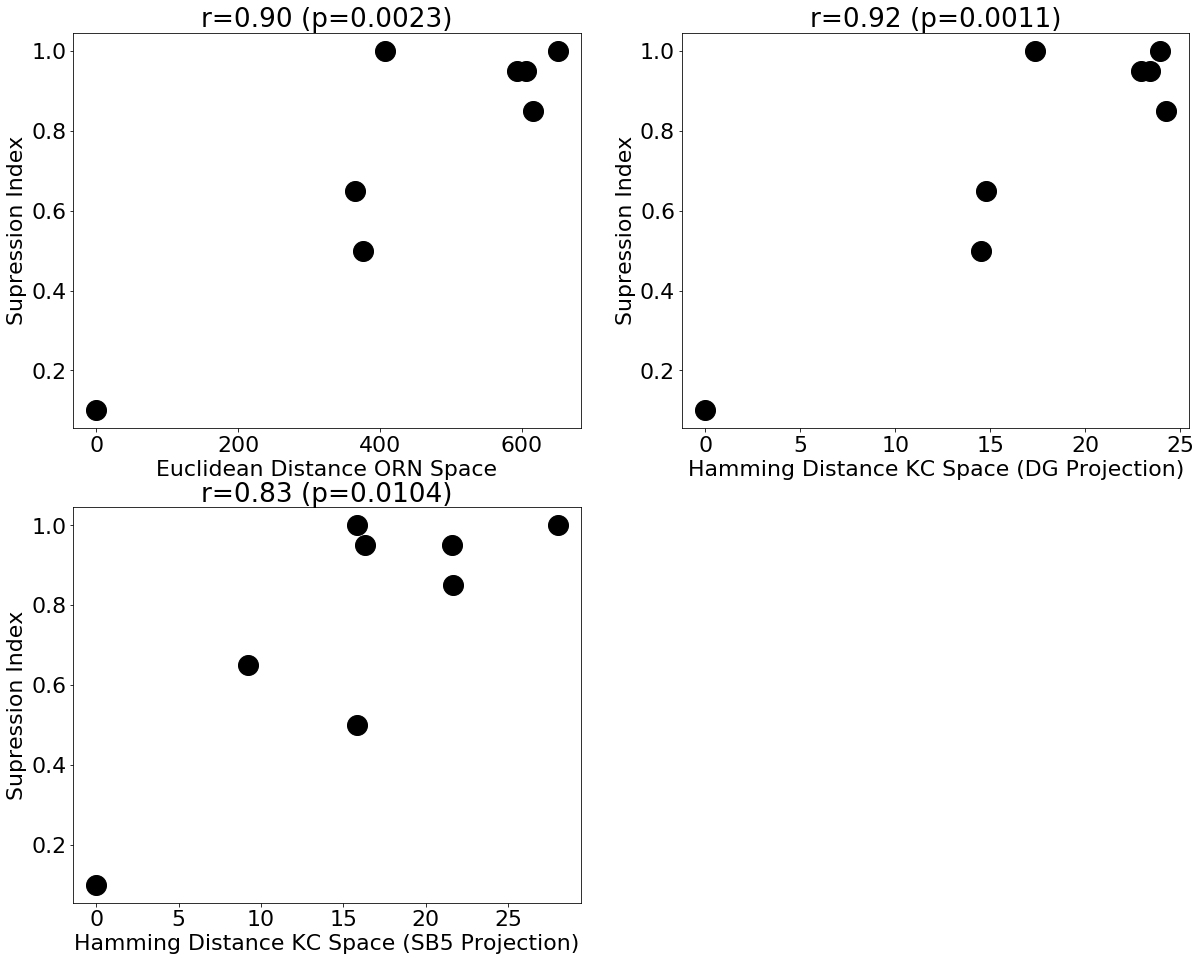

In [42]:
plt.figure(figsize =(20,16))
plt.subplot(2,2,1)
plt.plot(Xd_euc[:],xx[:],'ko',ms=ms)
# plt.title('r=%.2f (p=%.4f)' %spearmanr(Xd_euc,xx))
plt.title('r=%.2f (p=%.4f)' %pearsonr(Xd_euc,xx))
# plt.plot(Xd_euc[1:],xx[1:],'ko')
# plt.title('r=%.2f (p=%.4f)' %spearmanr(Xd_euc[1:],xx[1:]))
# plt.title('r=%.2f (p=%.4f)' %pearsonr(Xd_euc[1:],xx[1:]))
plt.xlabel('Euclidean Distance ORN Space')
plt.ylabel('Supression Index')

plt.subplot(2,2,2)
plt.plot(np.mean(MCH_hash,axis=0),xx[:],'ko',ms=ms)
plt.title('r=%.2f (p=%.4f)' %pearsonr(np.mean(MCH_hash,axis=0),xx))

plt.xlabel('Hamming Distance KC Space (DG Projection)')
plt.ylabel('Supression Index')

plt.subplot(2,2,3)
plt.plot(np.mean(MCH_hashSB,axis=0),xx[:],'ko',ms=ms)
plt.title('r=%.2f (p=%.4f)' %pearsonr(np.mean(MCH_hashSB,axis=0),xx))
plt.xlabel('Hamming Distance KC Space (SB5 Projection)')
plt.ylabel('Supression Index')
plt.show()

In [43]:
def one_tail_pearson(x,y):
    r,p = pearsonr(x,y)
    return (r,p/2)

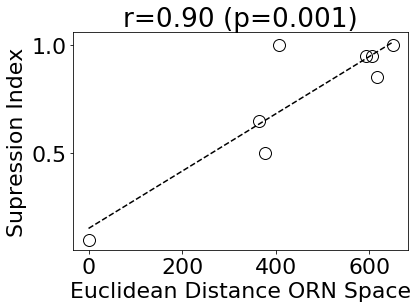

In [51]:
plt.plot(Xd_euc[:],xx[:],'ko',ms=12,markerfacecolor='none')
# plt.title('r=%.2f (p=%.4f)' %spearmanr(Xd_euc,xx))
plt.title('r=%.2f (p=%.3f)' %one_tail_pearson(Xd_euc,xx))

slope, intercept, _, pp, _ = linregress(Xd_euc,xx)
xxx = np.array([0,375,650])
plt.plot(xxx,xxx*slope+intercept,'k--')

plt.xlabel('Euclidean Distance ORN Space')
plt.ylabel('Supression Index')
plt.show()

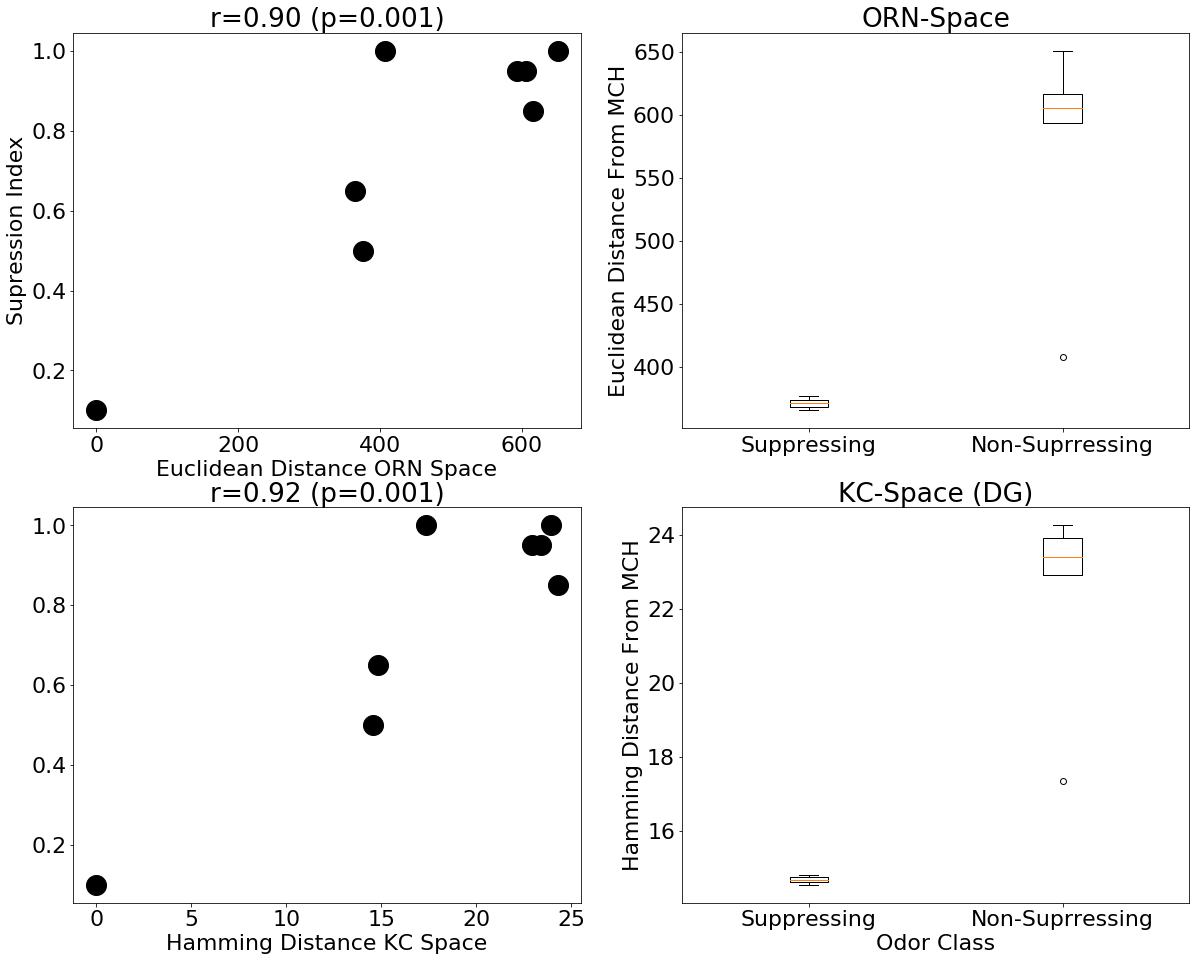

In [45]:
plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
plt.plot(Xd_euc[:],xx[:],'ko',ms=ms)
plt.title('r=%.2f (p=%.3f)' %one_tail_pearson(Xd_euc,xx))
plt.xlabel('Euclidean Distance ORN Space')
plt.ylabel('Supression Index')

plt.subplot(2,2,2)
dbar = [Xd_euc[oo],Xd_euc[ox]]
plt.boxplot(dbar)
plt.xticks([1,2],['Suppressing','Non-Suprressing'])
#plt.xlabel('Odor Class')
plt.ylabel('Euclidean Distance From MCH')
plt.title('ORN-Space')

plt.subplot(2,2,3)
plt.plot(np.mean(MCH_hash,axis=0),xx,'ko',ms=ms)
plt.title('r=%.2f (p=%.3f)' %one_tail_pearson(np.mean(MCH_hash,axis=0),xx))
plt.xlabel('Hamming Distance KC Space')
#plt.ylabel('Supression Index')


plt.subplot(2,2,4)
dbar = [np.mean(MCH_hash[:,oo],axis=0),np.mean(MCH_hash[:,ox],axis=0)]
plt.boxplot(dbar)
plt.xticks([1,2],['Suppressing','Non-Suprressing'])
plt.xlabel('Odor Class')
plt.ylabel('Hamming Distance From MCH')
#plt.title('Supressing vs. Non-Supressing Odors')
# plt.title('KC-Space (' + SB_str + ')')
plt.title('KC-Space (DG)')

plt.show()